## SVM

데이터 자료

https://archive.ics.uci.edu/ml/index.php

https://www.kaggle.com/datasets
___

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from sklearn import datasets

data = datasets.load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [157]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [158]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [159]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [160]:
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_X.shape

(569, 30)

In [161]:
df_y = pd.DataFrame(data.target, columns=['target'])
df_y.shape

(569, 1)

In [162]:
df_X.isna().sum(axis=0)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [163]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [164]:
df_y.value_counts()

target
1         357
0         212
dtype: int64

### 학습/테스트 데이터 분리

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, shuffle=True, random_state=2022, stratify=df_y)

In [166]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

### 학습

LinearSVC 도 존재하나, 아래와 같이 작성하는 것이 성능이 더 좋음(?)

In [167]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
y_train = y_train.values.reshape(-1)
# 모델 학습할 때 y_train 이 1차원이 아니라 2차원이라 경고 메세지 뜸(datafarme 으로 만들어서 2차원. Series로 하면 1차원, 동작은 함. 경고일뿐.

In [168]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

### 테스트

In [169]:
X_test = ss.transform(X_test)
y_test = y_test.values.reshape(-1)

In [170]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9912280701754386

In [171]:
(y_test == y_pred).sum()/y_test.shape[0]

0.9912280701754386

In [176]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [173]:
# heatmap plot

<AxesSubplot:>

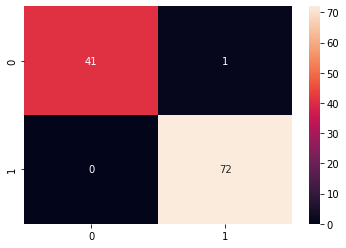

In [177]:
sns.heatmap(cm, annot=True)

### RBF

In [189]:
clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.001)
clf.fit(X_train_scaled, y_train)

SVC(gamma=0.001)

In [190]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9912280701754386

### 하이퍼 파라미터 튜닝

#### - GridSearch

In [195]:
from sklearn.model_selection import GridSearchCV

param = {
    'C': range(1, 100),
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5],
    'kernel': ['rbf']
}

model = svm.SVC()
grid = GridSearchCV(model, param, refit=True)  # CV 가 붙으면 내부적으로 CROSS VALIDATION을 한다는 것 (5번)
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100),
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5],
                         'kernel': ['rbf']})

In [196]:
grid.best_params_

{'C': 3, 'gamma': 0.05, 'kernel': 'rbf'}

In [200]:
beset_clf = grid.best_estimator_

In [199]:
grid.best_score_ # 학습할 때 최상의 결과 (x_train 으로 돌릴 때)

0.9780219780219781

In [204]:
y_pred = beset_clf = grid.best_estimator_.predict(X_test)  # 다시 돌려보기

In [205]:
accuracy_score(y_test, y_pred)

0.9824561403508771

#### - Random Search

In [209]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # 랜덤 서치로 그냥 뽑는게 아니라 분포 안에서 뽑아달라 하기 위해서 사용

param = {
    'C': uniform(),
    'gamma': uniform(),
    'kernel': ['rbf']
}

model = svm.SVC()
rs = RandomizedSearchCV(model, param, refit=True)
rs.fit(X_train_scaled, y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001407B1ECA60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001407B1E5D60>,
                                        'kernel': ['rbf']})

In [210]:
rs.best_params_

{'C': 0.9260130737332907, 'gamma': 0.20446123516583692, 'kernel': 'rbf'}

In [211]:
y_pred = rs.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.956140350877193